## Odin - Data Science Bootcamp Capstone Project
---
# Topic - *Corona Virus Pridiction*
---
By `Nikhil Choudhary ~ S5852   `

# SECTION 1 - *Importance of my Proposal*

*Corona Virus is a noval lethal virus which is spread all over the world. It's said that this virus was first mutated in China, but apart from this we had a major chalange, that how to tackle this.
The Objective of this proposal is to leverage predictive analytics on Covid19 dataset to enhance our understanding of the pandemic, predict potential outnreaks and inform evidence-based decision-making for effective public health interventions.*

My proposal is very important in today's world due to following reasons.
- Contribution to Scientific Knowledge
-Vaccine Distribution Planning
-Public Health Policies
-Early detection  and Timely Interventions
-Public Awareness
-Take preventative measures
-Screening programs
-Reducing Healthcare Burden
-Improving patients health in early stages
-Data-Driven Decision-Making

Predicting a disease accurately is going to help Scientists to make new discoveries and solution outbreak for the disease. Early detection of the disease is going to increase and timely intervention would be easy. Early preventive measures will help in screening people who are at higher risk of covid19 and can recommend preventive measures. As a result a prediction model is going to cutdown the cost of the treament and provide patient-centric healthcare delivery.



# Libraries Importation

In [394]:
# Feature Selection

import scipy.stats as stats
from scipy.stats import chi2_contingency

# Data Modeling

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sl
import seaborn as sns
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

# Model Evaluation & saving the model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
import pickle

In [395]:
df= pd.read_csv("/content/drive/MyDrive/Corona_test.csv")
df.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [396]:
df["Test_date"] = pd.to_datetime(df["Test_date"])

## Understanding Data

In [397]:
#checking the shape i.e. number of rows and columns
df.shape

(278848, 11)

In [398]:
#checking the data-types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  object        
 3   Fever                278848 non-null  object        
 4   Sore_throat          278848 non-null  object        
 5   Shortness_of_breath  278848 non-null  object        
 6   Headache             278848 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [399]:
#checking for null values
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

##No null values found

In [400]:
#checking for the unique values in all the columns
for i in df:
  print(i, ":", df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['2020-11-03T00:00:00.000000000' '2020-12-03T00:00:00.000000000'
 '2020-03-13T00:00:00.000000000' '2020-03-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2020-03-17T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-19T00:00:00.000000000' '2020-03-20T00:00:00.000000000'
 '2020-03-21T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-27T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-29T00:00:00.000000000' '2020-03-30T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-01-04T00:00:00.000000000'
 '2020-02-04T00:00:00.000000000' '2020-03-04T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-05-04T00:00:00.000000000'
 '2020-06-04T00:00:00.000000000' '2020-07-04T00:00:00.000000000'
 '2020-08-04T00:00:00

# **4. Data Cleaning**

In [401]:
#removing unwanted columns as these columns are not required for Covid-19 prediction.
df.drop(columns=['Ind_ID'],inplace=True)

In [402]:
df

Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0      2020-11-03           TRUE  FALSE        TRUE               FALSE   
1      2020-11-03          FALSE   TRUE       FALSE               FALSE   
2      2020-11-03          FALSE   TRUE       FALSE               FALSE   
3      2020-11-03           TRUE  FALSE       FALSE               FALSE   
4      2020-11-03           TRUE  FALSE       FALSE               FALSE   
...           ...            ...    ...         ...                 ...   
278843 2020-04-30          False  False       False               False   
278844 2020-04-30          False  False       False               False   
278845 2020-04-30          False  False       False               False   
278846 2020-04-30          False  False       False               False   
278847 2020-04-30          False  False       False               False   

       Headache    Corona Age_60_above     Sex           Known_contact  
0         FALSE  negative         None    None                  Abroad  
1         FALSE  positive         None    None                  Abroad  
2         FALSE  positive         None    None                  Abroad  
3         FALSE  negative         None    None                  Abroad  
4         FALSE  negative         None    None  Contact with confirmed  
...         ...       ...          ...     ...                     ...  
278843    False  positive         None    male                   Other  
278844    False  negative         None  female                   Other  
278845    False  negative         None    male                   Other  
278846    False  negative         None    male                   Other  
278847    False  negative         None  female                   Other  

[278848 rows x 10 columns]

In [403]:
#checking for the values of individual columns.
for i in df:
  print(i,  ":" , df[i].value_counts())

Test_date : 2020-04-20    10921
2020-04-19    10199
2020-04-22     9646
2020-04-21     9624
2020-04-16     9138
2020-04-23     8744
2020-01-04     8654
2020-04-13     8425
2020-02-04     8188
2020-03-04     8079
2020-04-17     7645
2020-05-04     7509
2020-04-30     7313
2020-04-27     7304
2020-04-15     7149
2020-03-31     7134
2020-04-24     7028
2020-03-26     6663
2020-04-14     6571
2020-04-28     6334
2020-04-18     6321
2020-04-26     6131
2020-12-04     5984
2020-03-27     5963
2020-07-04     5931
2020-03-30     5915
2020-10-04     5678
2020-03-28     5602
2020-03-25     5495
2020-06-04     5368
2020-03-29     5277
2020-04-04     5145
2020-04-25     5052
2020-03-24     4735
2020-09-04     4539
2020-11-04     4341
2020-04-29     4259
2020-08-04     4058
2020-03-22     3565
2020-03-23     3494
2020-03-19     2243
2020-03-18     1991
2020-03-20     1870
2020-03-21     1648
2020-03-17     1463
2020-03-16     1304
2020-03-15      985
2020-03-13      686
2020-12-03      634
2020-03-

# **Dropping "None" values With Less Weightage In Respective Columns.**

In [404]:
#dropping rows with none values as it will not impact the data much
df=df[df.Cough_symptoms!='None']
df=df[df.Shortness_of_breath!='None']
df=df[df.Headache!='None']
df["Age_60_above"].replace({"None" : "Unknown"}, inplace=True)
df["Sex"].replace({"None" : "Unknown"}, inplace=True)
df=df[df.Corona!='other']
df["Known_contact"].replace({"other" : "Unknown"}, inplace=True)

##Convert them in One format

In [405]:
df["Cough_symptoms"] = df["Cough_symptoms"].astype(str).str.lower()
df["Shortness_of_breath"] = df["Shortness_of_breath"].astype(str).str.lower()

In [406]:
df["Cough_symptoms"].value_counts()

false    233133
true      41571
Name: Cough_symptoms, dtype: int64

In [407]:
df=df[df.Fever!='none']

In [408]:
df["Fever"].value_counts()

False    135729
FALSE    117599
TRUE      11588
True       9786
None          2
Name: Fever, dtype: int64

In [409]:
Fever = "Fever"
df["Fever"] = df["Fever"].astype(str).str.lower()
df["Fever"].value_counts()

false    253328
true      21374
none          2
Name: Fever, dtype: int64

In [410]:
df["Shortness_of_breath"].value_counts()

false    273158
true       1546
Name: Shortness_of_breath, dtype: int64

In [411]:
Shortness_of_breath = "Shortness_of_breath"
df["Shortness_of_breath"] = df["Shortness_of_breath"].astype(str).str.lower()
df["Shortness_of_breath"].value_counts()

false    273158
true       1546
Name: Shortness_of_breath, dtype: int64

In [412]:
Sore_throat = "Sore_throat"
df[Sore_throat] = df[Sore_throat].astype(str).str.lower()
df["Sore_throat"].value_counts()

false    272816
true       1888
Name: Sore_throat, dtype: int64

In [413]:
df["Headache"].value_counts()

False    209284
FALSE     63041
TRUE       1402
True        977
Name: Headache, dtype: int64

In [414]:
headache = "Headache"
df["Headache"] = df["Headache"].astype(str).str.lower()
df["Headache"].value_counts()

false    272325
true       2379
Name: Headache, dtype: int64

In [415]:
df["Corona"].value_counts()

negative    260008
positive     14696
Name: Corona, dtype: int64

In [416]:
df["Age_60_above"].value_counts()

Unknown    125659
No         123670
Yes         25375
Name: Age_60_above, dtype: int64

In [417]:
df["Sex"].value_counts()

female     128414
male       127256
Unknown     19034
Name: Sex, dtype: int64

In [418]:
#renaming column name
df.rename(columns={'Sex': 'Gender'}, inplace=True)

In [419]:
df["Known_contact"].value_counts()

Other                     239169
Abroad                     25068
Contact with confirmed     10467
Name: Known_contact, dtype: int64

<Axes: xlabel='Corona', ylabel='count'>

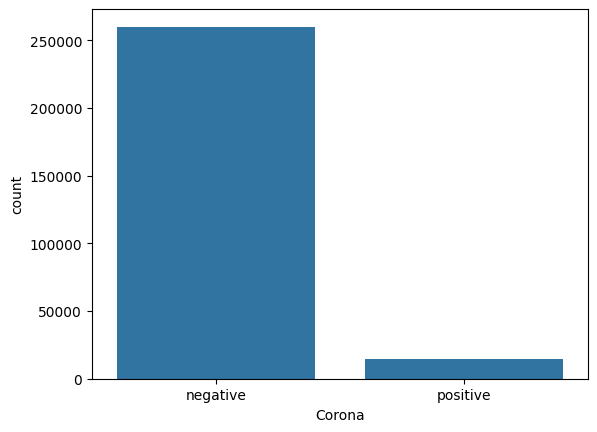

In [420]:
#Distribution of target variable
sns.countplot(x='Corona',data=df)


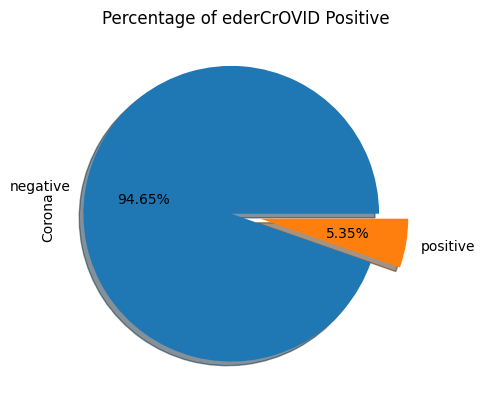

In [421]:
# Pie chart presentation of Covid patients
df["Corona"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Percentage of ederCrOVID Positive')
plt.show()

####Number of Covid-Negative is much higher than Covid-Positive

In [422]:
#Selecting features
features = df.columns.tolist()
features.remove('Corona')
print(features)

['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Gender', 'Known_contact']


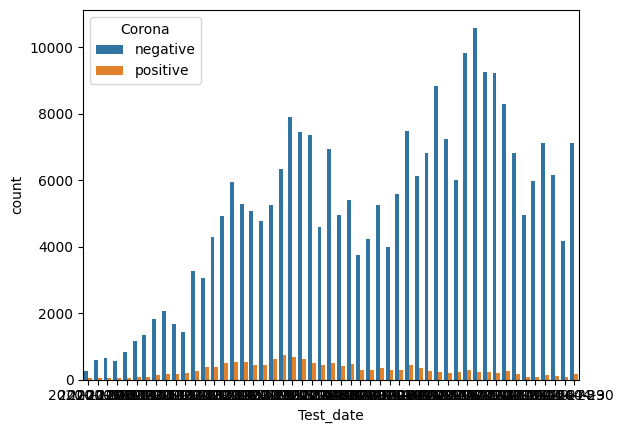

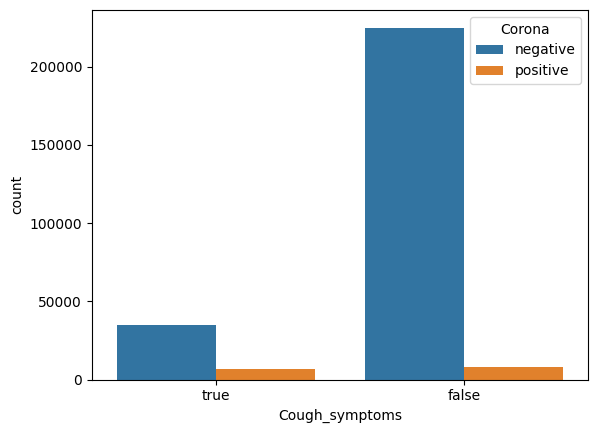

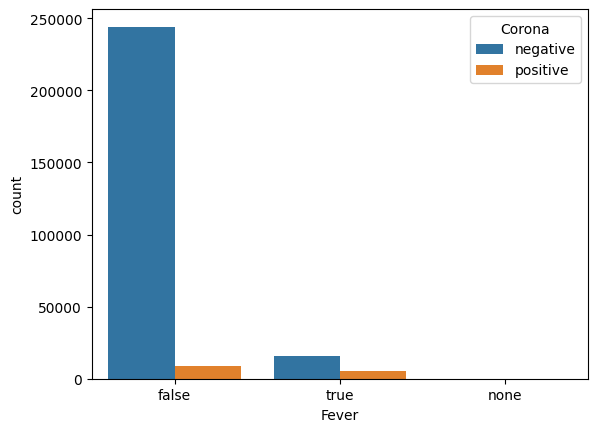

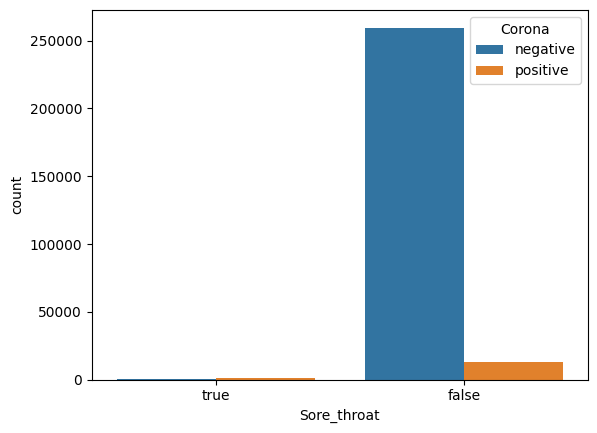

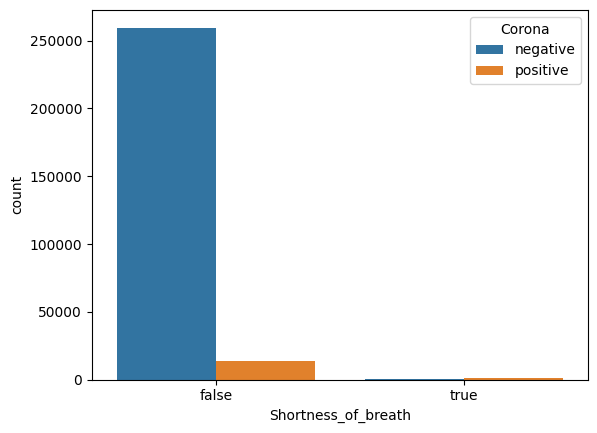

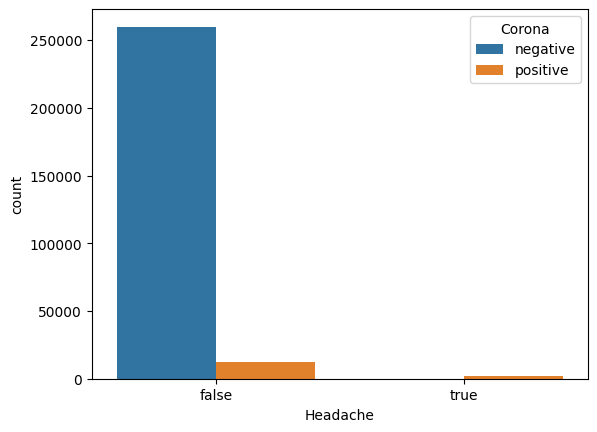

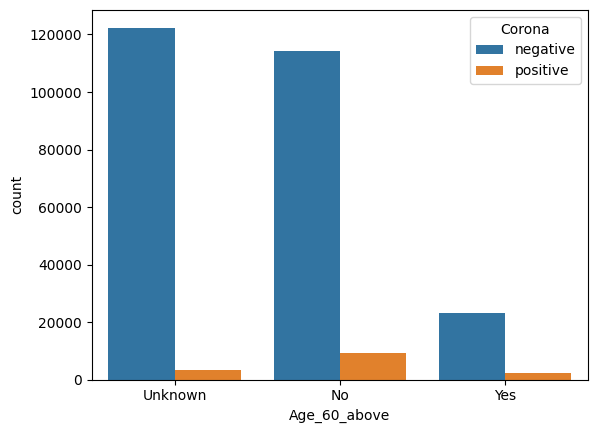

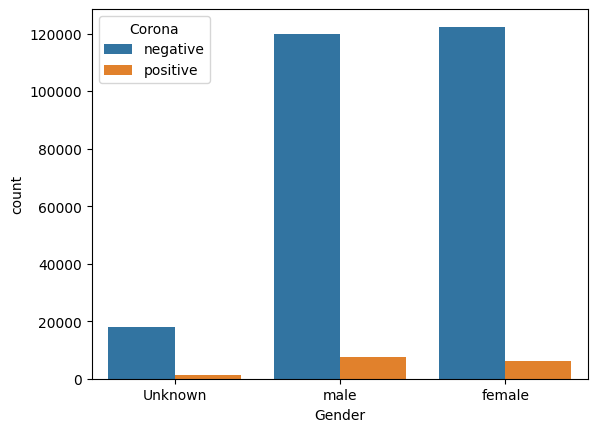

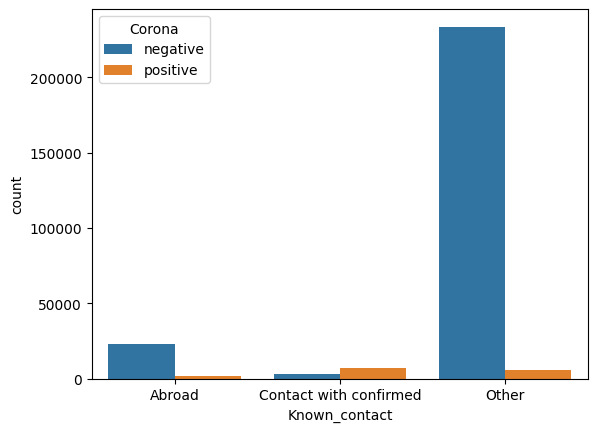

In [423]:
for feature in features:
    plt.figure()
    sns.countplot(x= feature,hue='Corona',data=df)
    plt.savefig('covi-1.png')

### From above graphical representation we can confirm that Fever and Corona are slightly related.

###Replacing None with Unknown

In [424]:
df["Age_60_above"].replace({"None" : "Unknown"}, inplace=True)
df["Gender"].replace({"None" : "Unknown"}, inplace=True)
df["Known_contact"].replace({"None" : "Unknown"}, inplace=True)

In [425]:
df['Gender'].value_counts()

female     128414
male       127256
Unknown     19034
Name: Gender, dtype: int64

In [426]:
df


Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0      2020-11-03           true  false        true               false   
1      2020-11-03          false   true       false               false   
2      2020-11-03          false   true       false               false   
3      2020-11-03           true  false       false               false   
4      2020-11-03           true  false       false               false   
...           ...            ...    ...         ...                 ...   
278843 2020-04-30          false  false       false               false   
278844 2020-04-30          false  false       false               false   
278845 2020-04-30          false  false       false               false   
278846 2020-04-30          false  false       false               false   
278847 2020-04-30          false  false       false               false   

       Headache    Corona Age_60_above   Gender           Known_contact  
0         false  negative      Unknown  Unknown                  Abroad  
1         false  positive      Unknown  Unknown                  Abroad  
2         false  positive      Unknown  Unknown                  Abroad  
3         false  negative      Unknown  Unknown                  Abroad  
4         false  negative      Unknown  Unknown  Contact with confirmed  
...         ...       ...          ...      ...                     ...  
278843    false  positive      Unknown     male                   Other  
278844    false  negative      Unknown   female                   Other  
278845    false  negative      Unknown     male                   Other  
278846    false  negative      Unknown     male                   Other  
278847    false  negative      Unknown   female                   Other  

[274704 rows x 10 columns]

# After cleaning: <br>
Total rows = 274704

# **Exporting Cleaned Data for SQL Analysis**

In [427]:
import duckdb
conn = duckdb.connect()

In [428]:
conn.register("df",df)

In [429]:
conn.execute("select * from df").fetchdf()

Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0      2020-11-03           true  false        true               false   
1      2020-11-03          false   true       false               false   
2      2020-11-03          false   true       false               false   
3      2020-11-03           true  false       false               false   
4      2020-11-03           true  false       false               false   
...           ...            ...    ...         ...                 ...   
274699 2020-04-30          false  false       false               false   
274700 2020-04-30          false  false       false               false   
274701 2020-04-30          false  false       false               false   
274702 2020-04-30          false  false       false               false   
274703 2020-04-30          false  false       false               false   

       Headache    Corona Age_60_above   Gender           Known_contact  
0         false  negative      Unknown  Unknown                  Abroad  
1         false  positive      Unknown  Unknown                  Abroad  
2         false  positive      Unknown  Unknown                  Abroad  
3         false  negative      Unknown  Unknown                  Abroad  
4         false  negative      Unknown  Unknown  Contact with confirmed  
...         ...       ...          ...      ...                     ...  
274699    false  positive      Unknown     male                   Other  
274700    false  negative      Unknown   female                   Other  
274701    false  negative      Unknown     male                   Other  
274702    false  negative      Unknown     male                   Other  
274703    false  negative      Unknown   female                   Other  

[274704 rows x 10 columns]

In [430]:
#Number of corona patient who face shortness of breath
conn.execute("select count(*) from df where Shortness_of_breath= 'true'").fetchdf()

count_star()
0          1546

There are 1546 patients who suffer from Shortness of breath

In [431]:
#Number of negative Covid patient having fever and sore throat
conn.execute("select count(*) from df where Fever = 'false' and Sore_throat = 'false'").fetchdf()

count_star()
0        252330

There are 252330 patients who are covid negative and suffer from fever and sore throat

In [432]:
#3 Covid positive patient by date
conn.execute("select extract(month from Test_date)as Month, Corona from df WHERE Corona = 'positive'").fetchdf()

Month    Corona
0         11  positive
1         11  positive
2         11  positive
3         11  positive
4         11  positive
...      ...       ...
14691      4  positive
14692      4  positive
14693      4  positive
14694      4  positive
14695      4  positive

[14696 rows x 2 columns]

In [433]:
# Female negative patient who suffer from cough and headache symptoms
conn.execute ("select * from df where Gender = 'female' and Corona = 'negative' and Cough_symptoms = 'true' and Headache = 'true'").fetchdf()

Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0  2020-03-22           true   true        true               false     true   
1  2020-03-22           true   true        true               false     true   
2  2020-03-23           true  false        true               false     true   
3  2020-03-23           true   true       false               false     true   
4  2020-03-23           true  false        true                true     true   
5  2020-03-23           true   true       false               false     true   
6  2020-03-23           true   true       false               false     true   
7  2020-03-27           true   true        true                true     true   
8  2020-03-27           true  false       false                true     true   
9  2020-03-27           true   true       false               false     true   
10 2020-03-28           true  false        true                true     true   
11 2020-03-29           true   true       false               false     true   
12 2020-03-29           true  false       false               false     true   
13 2020-03-29           true   true        true               false     true   
14 2020-03-30           true  false        true               false     true   
15 2020-03-30           true  false        true               false     true   
16 2020-01-04           true   true       false               false     true   
17 2020-01-04           true   true        true                true     true   
18 2020-03-04           true  false        true               false     true   
19 2020-03-04           true  false        true                true     true   
20 2020-03-04           true  false       false                true     true   
21 2020-03-04           true  false        true                true     true   
22 2020-05-04           true  false       false               false     true   
23 2020-09-04           true   true       false                true     true   
24 2020-11-04           true  false        true                true     true   
25 2020-11-04           true   true        true               false     true   
26 2020-12-04           true   true        true               false     true   
27 2020-04-13           true  false       false               false     true   
28 2020-04-13           true  false       false               false     true   
29 2020-04-16           true  false       false               false     true   
30 2020-04-16           true  false        true                true     true   
31 2020-04-25           true  false       false               false     true   

      Corona Age_60_above  Gender           Known_contact  
0   negative           No  female                  Abroad  
1   negative           No  female                  Abroad  
2   negative           No  female                  Abroad  
3   negative           No  female                   Other  
4   negative           No  female  Contact with confirmed  
5   negative          Yes  female                  Abroad  
6   negative           No  female  Contact with confirmed  
7   negative           No  female  Contact with confirmed  
8   negative           No  female  Contact with confirmed  
9   negative           No  female  Contact with confirmed  
10  negative           No  female  Contact with confirmed  
11  negative           No  female  Contact with confirmed  
12  negative          Yes  female  Contact with confirmed  
13  negative           No  female  Contact with confirmed  
14  negative           No  female                  Abroad  
15  negative           No  female  Contact with confirmed  
16  negative           No  female  Contact with confirmed  
17  negative           No  female  Contact with confirmed  
18  negative           No  female                  Abroad  
19  negative           No  female  Contact with confirmed  
20  negative           No  female  Contact with confirmed  
21  negative           No  female  Contact 

In [434]:
# Elderly patients having breathing problem
conn.execute ("select count(*) from df where Age_60_above = 'Yes' and Corona = 'positve'").fetchdf()

count_star()
0             0

In [436]:
df.head()

Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0 2020-11-03           true  false        true               false    false   
1 2020-11-03          false   true       false               false    false   
2 2020-11-03          false   true       false               false    false   
3 2020-11-03           true  false       false               false    false   
4 2020-11-03           true  false       false               false    false   

     Corona Age_60_above   Gender           Known_contact  
0  negative      Unknown  Unknown                  Abroad  
1  positive      Unknown  Unknown                  Abroad  
2  positive      Unknown  Unknown                  Abroad  
3  negative      Unknown  Unknown                  Abroad  
4  negative      Unknown  Unknown  Contact with confirmed

#Encoding the Corona Columns
- Negative = 0
- Positive = 1

In [437]:
df["Corona"] = le.fit_transform(df["Corona"])

In [438]:
df

Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0      2020-11-03           true  false        true               false   
1      2020-11-03          false   true       false               false   
2      2020-11-03          false   true       false               false   
3      2020-11-03           true  false       false               false   
4      2020-11-03           true  false       false               false   
...           ...            ...    ...         ...                 ...   
278843 2020-04-30          false  false       false               false   
278844 2020-04-30          false  false       false               false   
278845 2020-04-30          false  false       false               false   
278846 2020-04-30          false  false       false               false   
278847 2020-04-30          false  false       false               false   

       Headache  Corona Age_60_above   Gender           Known_contact  
0         false       0      Unknown  Unknown                  Abroad  
1         false       1      Unknown  Unknown                  Abroad  
2         false       1      Unknown  Unknown                  Abroad  
3         false       0      Unknown  Unknown                  Abroad  
4         false       0      Unknown  Unknown  Contact with confirmed  
...         ...     ...          ...      ...                     ...  
278843    false       1      Unknown     male                   Other  
278844    false       0      Unknown   female                   Other  
278845    false       0      Unknown     male                   Other  
278846    false       0      Unknown     male                   Other  
278847    false       0      Unknown   female                   Other  

[274704 rows x 10 columns]

In [439]:
#creating a copy of original dataset with name as df1
df1=df.copy()

In [440]:
#dropping Test_date columns as it is not much required for EDA.
df1.drop(columns='Test_date',inplace=True)

In [441]:
#checking df1 which has no Test_date column
df1

Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  Corona  \
0                true  false        true               false    false       0   
1               false   true       false               false    false       1   
2               false   true       false               false    false       1   
3                true  false       false               false    false       0   
4                true  false       false               false    false       0   
...               ...    ...         ...                 ...      ...     ...   
278843          false  false       false               false    false       1   
278844          false  false       false               false    false       0   
278845          false  false       false               false    false       0   
278846          false  false       false               false    false       0   
278847          false  false       false               false    false       0   

       Age_60_above   Gender           Known_contact  
0           Unknown  Unknown                  Abroad  
1           Unknown  Unknown                  Abroad  
2           Unknown  Unknown                  Abroad  
3           Unknown  Unknown                  Abroad  
4           Unknown  Unknown  Contact with confirmed  
...             ...      ...                     ...  
278843      Unknown     male                   Other  
278844      Unknown   female                   Other  
278845      Unknown     male                   Other  
278846      Unknown     male                   Other  
278847      Unknown   female                   Other  

[274704 rows x 9 columns]

In [442]:
#checking df which has Test_date column
df

Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0      2020-11-03           true  false        true               false   
1      2020-11-03          false   true       false               false   
2      2020-11-03          false   true       false               false   
3      2020-11-03           true  false       false               false   
4      2020-11-03           true  false       false               false   
...           ...            ...    ...         ...                 ...   
278843 2020-04-30          false  false       false               false   
278844 2020-04-30          false  false       false               false   
278845 2020-04-30          false  false       false               false   
278846 2020-04-30          false  false       false               false   
278847 2020-04-30          false  false       false               false   

       Headache  Corona Age_60_above   Gender           Known_contact  
0         false       0      Unknown  Unknown                  Abroad  
1         false       1      Unknown  Unknown                  Abroad  
2         false       1      Unknown  Unknown                  Abroad  
3         false       0      Unknown  Unknown                  Abroad  
4         false       0      Unknown  Unknown  Contact with confirmed  
...         ...     ...          ...      ...                     ...  
278843    false       1      Unknown     male                   Other  
278844    false       0      Unknown   female                   Other  
278845    false       0      Unknown     male                   Other  
278846    false       0      Unknown     male                   Other  
278847    false       0      Unknown   female                   Other  

[274704 rows x 10 columns]

In [443]:
#getting all the independent variable in one dataframe
ind_var=df1.drop(columns='Corona')
ind_var

Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0                true  false        true               false    false   
1               false   true       false               false    false   
2               false   true       false               false    false   
3                true  false       false               false    false   
4                true  false       false               false    false   
...               ...    ...         ...                 ...      ...   
278843          false  false       false               false    false   
278844          false  false       false               false    false   
278845          false  false       false               false    false   
278846          false  false       false               false    false   
278847          false  false       false               false    false   

       Age_60_above   Gender           Known_contact  
0           Unknown  Unknown                  Abroad  
1           Unknown  Unknown                  Abroad  
2           Unknown  Unknown                  Abroad  
3           Unknown  Unknown                  Abroad  
4           Unknown  Unknown  Contact with confirmed  
...             ...      ...                     ...  
278843      Unknown     male                   Other  
278844      Unknown   female                   Other  
278845      Unknown     male                   Other  
278846      Unknown     male                   Other  
278847      Unknown   female                   Other  

[274704 rows x 8 columns]

In [444]:
fig=px.histogram(df,x='Fever',y='Corona',width=800, height=400,title='Corona(+) V/s Fever')
fig.show();

In [445]:
fig=px.histogram(df,x='Known_contact',y='Corona',width=800, height=400,title='Corona(+) V/s Sex',color_discrete_sequence=['indianred'])
fig.show();

# Insights
- Mostly Patients with corona positive have cough_symptoms and fever.
- Headache, sore throat and shortness of breath do not contribute in Corona positivity.
- Majority of Corona Positive Patients have been in contact with other positive patients.

#Feature Engineering

## Observing the Correlation among the data

Using label encoding to covert the categorical data to binary.

In [446]:
df["Cough_symptoms"] = le.fit_transform(df1["Cough_symptoms"])
df["Fever"] = le.fit_transform(df1["Fever"])
df["Sore_throat"] = le.fit_transform(df1["Sore_throat"])
df["Shortness_of_breath"] = le.fit_transform(df1["Shortness_of_breath"])
df["Headache"] = le.fit_transform(df1["Headache"])
df["Age_60_above"] = le.fit_transform(df1["Age_60_above"])
df["Corona"] = le.fit_transform(df1["Corona"])
df["Gender"] = le.fit_transform(df1["Gender"])
df["Known_contact"] = le.fit_transform(df1["Known_contact"])

In [447]:
df

Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0      2020-11-03               1      0            1                    0   
1      2020-11-03               0      2            0                    0   
2      2020-11-03               0      2            0                    0   
3      2020-11-03               1      0            0                    0   
4      2020-11-03               1      0            0                    0   
...           ...             ...    ...          ...                  ...   
278843 2020-04-30               0      0            0                    0   
278844 2020-04-30               0      0            0                    0   
278845 2020-04-30               0      0            0                    0   
278846 2020-04-30               0      0            0                    0   
278847 2020-04-30               0      0            0                    0   

        Headache  Corona  Age_60_above  Gender  Known_contact  
0              0       0             1       0              0  
1              0       1             1       0              0  
2              0       1             1       0              0  
3              0       0             1       0              0  
4              0       0             1       0              1  
...          ...     ...           ...     ...            ...  
278843         0       1             1       2              2  
278844         0       0             1       1              2  
278845         0       0             1       2              2  
278846         0       0             1       2              2  
278847         0       0             1       1              2  

[274704 rows x 10 columns]

In [448]:
df.corr()

Cough_symptoms     Fever  Sore_throat  \
Cough_symptoms             1.000000  0.453811     0.115609   
Fever                      0.453811  1.000000     0.122231   
Sore_throat                0.115609  0.122231     1.000000   
Shortness_of_breath        0.106327  0.125838     0.195181   
Headache                   0.116863  0.169825     0.323201   
Corona                     0.196819  0.266662     0.278442   
Age_60_above              -0.064528 -0.026206    -0.036780   
Gender                     0.032539  0.025876    -0.032192   
Known_contact             -0.571637 -0.348222    -0.088699   

                     Shortness_of_breath  Headache    Corona  Age_60_above  \
Cough_symptoms                  0.106327  0.116863  0.196819     -0.064528   
Fever                           0.125838  0.169825  0.266662     -0.026206   
Sore_throat                     0.195181  0.323201  0.278442     -0.036780   
Shortness_of_breath             1.000000  0.201992  0.233399     -0.010113   
Headache                        0.201992  1.000000  0.367475     -0.052341   
Corona                          0.233399  0.367475  1.000000     -0.044937   
Age_60_above                   -0.010113 -0.052341 -0.044937      1.000000   
Gender                         -0.039852 -0.008841  0.014653      0.010817   
Known_contact                  -0.074619 -0.091803 -0.211888      0.076326   

                       Gender  Known_contact  
Cough_symptoms       0.032539      -0.571637  
Fever                0.025876      -0.348222  
Sore_throat         -0.032192      -0.088699  
Shortness_of_breath -0.039852      -0.074619  
Headache            -0.008841      -0.091803  
Corona               0.014653      -0.211888  
Age_60_above         0.010817       0.076326  
Gender               1.000000      -0.020027  
Known_contact       -0.020027       1.000000

In [449]:
correlation=df.corr()
correlation.style.background_gradient(cmap='PiYG',axis=None)

#None of the features are highly co-related

In [450]:
print(df['Cough_symptoms'].unique())
print(df['Fever'].unique())
print(df['Sore_throat'].unique())
print(df['Shortness_of_breath'].unique())
print(df['Headache'].unique())
print(df['Age_60_above'].unique())
print(df['Gender'].unique())
print(df['Known_contact'].unique())

[1 0]
[0 2 1]
[1 0]
[0 1]
[0 1]
[1 0 2]
[0 2 1]
[0 1 2]


In [451]:
df.head()

Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0 2020-11-03               1      0            1                    0   
1 2020-11-03               0      2            0                    0   
2 2020-11-03               0      2            0                    0   
3 2020-11-03               1      0            0                    0   
4 2020-11-03               1      0            0                    0   

   Headache  Corona  Age_60_above  Gender  Known_contact  
0         0       0             1       0              0  
1         0       1             1       0              0  
2         0       1             1       0              0  
3         0       0             1       0              0  
4         0       0             1       0              1

In [452]:
df

Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0      2020-11-03               1      0            1                    0   
1      2020-11-03               0      2            0                    0   
2      2020-11-03               0      2            0                    0   
3      2020-11-03               1      0            0                    0   
4      2020-11-03               1      0            0                    0   
...           ...             ...    ...          ...                  ...   
278843 2020-04-30               0      0            0                    0   
278844 2020-04-30               0      0            0                    0   
278845 2020-04-30               0      0            0                    0   
278846 2020-04-30               0      0            0                    0   
278847 2020-04-30               0      0            0                    0   

        Headache  Corona  Age_60_above  Gender  Known_contact  
0              0       0             1       0              0  
1              0       1             1       0              0  
2              0       1             1       0              0  
3              0       0             1       0              0  
4              0       0             1       0              1  
...          ...     ...           ...     ...            ...  
278843         0       1             1       2              2  
278844         0       0             1       1              2  
278845         0       0             1       2              2  
278846         0       0             1       2              2  
278847         0       0             1       1              2  

[274704 rows x 10 columns]

# **Train Test Split based on date**
We are required to split the dataset as training and testing data with the help of date.

We have to consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set.

In [453]:
# Breaking the data according to the date
import pandas as pd

# Assuming df is your DataFrame and "Test_date" is the column to be converted
df["Test_date"] = pd.to_datetime(df["Test_date"])
break_date = pd.Timestamp("2020-04-15")
df_train_set = df[df["Test_date"] <= break_date]
df_test_set = df[df["Test_date"] > break_date]

In [454]:
df_train_set

Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
928    2020-03-13               0      0            0                    0   
929    2020-03-13               0      0            0                    0   
930    2020-03-13               0      0            0                    0   
931    2020-03-13               1      2            0                    0   
932    2020-03-13               1      0            0                    0   
...           ...             ...    ...          ...                  ...   
163184 2020-04-15               0      0            0                    0   
163185 2020-04-15               0      0            0                    0   
163186 2020-04-15               0      0            0                    0   
163187 2020-04-15               0      0            0                    0   
163188 2020-04-15               0      0            0                    0   

        Headache  Corona  Age_60_above  Gender  Known_contact  
928            0       0             1       0              2  
929            0       0             1       0              2  
930            0       1             1       0              1  
931            0       1             1       0              0  
932            0       0             1       0              2  
...          ...     ...           ...     ...            ...  
163184         0       0             1       2              2  
163185         0       0             1       2              2  
163186         0       0             1       1              2  
163187         0       0             1       2              2  
163188         0       0             1       2              2  

[116545 rows x 10 columns]

In [455]:
df_test_set

Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0      2020-11-03               1      0            1                    0   
1      2020-11-03               0      2            0                    0   
2      2020-11-03               0      2            0                    0   
3      2020-11-03               1      0            0                    0   
4      2020-11-03               1      0            0                    0   
...           ...             ...    ...          ...                  ...   
278843 2020-04-30               0      0            0                    0   
278844 2020-04-30               0      0            0                    0   
278845 2020-04-30               0      0            0                    0   
278846 2020-04-30               0      0            0                    0   
278847 2020-04-30               0      0            0                    0   

        Headache  Corona  Age_60_above  Gender  Known_contact  
0              0       0             1       0              0  
1              0       1             1       0              0  
2              0       1             1       0              0  
3              0       0             1       0              0  
4              0       0             1       0              1  
...          ...     ...           ...     ...            ...  
278843         0       1             1       2              2  
278844         0       0             1       1              2  
278845         0       0             1       2              2  
278846         0       0             1       2              2  
278847         0       0             1       1              2  

[158159 rows x 10 columns]

In [456]:
#Spliting data into dependent and independent variable
X_train=df_train_set.drop(columns=['Test_date','Corona'],axis=1)

In [457]:
#Keeping data from 11th March to 15th April in training set as X_train and y_train
X_train

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
928                  0      0            0                    0         0   
929                  0      0            0                    0         0   
930                  0      0            0                    0         0   
931                  1      2            0                    0         0   
932                  1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
163184               0      0            0                    0         0   
163185               0      0            0                    0         0   
163186               0      0            0                    0         0   
163187               0      0            0                    0         0   
163188               0      0            0                    0         0   

        Age_60_above  Gender  Known_contact  
928                1       0              2  
929                1       0              2  
930                1       0              1  
931                1       0              0  
932                1       0              2  
...              ...     ...            ...  
163184             1       2              2  
163185             1       2              2  
163186             1       1              2  
163187             1       2              2  
163188             1       2              2  

[116545 rows x 8 columns]

In [458]:
y_train=df_train_set['Corona']
y_train

928       0
929       0
930       1
931       1
932       0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 116545, dtype: int64

In [459]:
#keeping data from 16th April to 30th April in X_test and y_test
X_test=df_test_set.drop(columns=['Test_date','Corona'],axis=1)
X_test

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      2            0                    0         0   
2                    0      2            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

        Age_60_above  Gender  Known_contact  
0                  1       0              0  
1                  1       0              0  
2                  1       0              0  
3                  1       0              0  
4                  1       0              1  
...              ...     ...            ...  
278843             1       2              2  
278844             1       1              2  
278845             1       2              2  
278846             1       2              2  
278847             1       1              2  

[158159 rows x 8 columns]

In [460]:
y_test=df_test_set['Corona']
y_test

0         0
1         1
2         1
3         0
4         0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 158159, dtype: int64

In [461]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%
#test_size=0.20 will divide the data further into 80% as training set and 20% as test set
# random_state=10 will fix the data set and will prevent random selection of data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 10)

In [462]:
#Training set

print('X_train Shape is:',X_train.shape)
print('y_train Shape is:',y_train.shape)
print('----------------------------------------')

#Testing set

print('X_test Shape is:',X_test.shape)
print('y_test Shape is:',y_test.shape)
print('----------------------------------------')

#Validation Set
print('X_validation Shape is:', X_val.shape)
print('y_validation Shape is:', y_val.shape)

X_train Shape is: (93236, 8)
y_train Shape is: (93236,)
----------------------------------------
X_test Shape is: (158159, 8)
y_test Shape is: (158159,)
----------------------------------------
X_validation Shape is: (23309, 8)
y_validation Shape is: (23309,)


# **Feature Scaling**

Is the process of tranforming the data so that they have a similar scale.

**Benifits of Feature Scaling**:
   1. Improves model performance
   2. Increase model robustness
   3. Improves model interpretability

In [463]:
#Importing StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

#Assigning Object
Std_scale=StandardScaler()

In [464]:
X_train=pd.DataFrame(Std_scale.fit_transform(X_train),columns=X_train.columns)
X_train

Cough_symptoms     Fever  Sore_throat  Shortness_of_breath  Headache  \
0           -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
1           -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
2           -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
3            2.479477  3.410493     9.024233             9.742782  7.846942   
4           -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
...               ...       ...          ...                  ...       ...   
93231       -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
93232       -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
93233       -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
93234       -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   
93235       -0.403311 -0.293223    -0.110813            -0.102640 -0.127438   

       Age_60_above    Gender  Known_contact  
0          0.848555  1.009149       0.371304  
1         -0.526704  1.009149       0.371304  
2         -0.526704 -0.449075       0.371304  
3         -0.526704  1.009149      -1.359728  
4         -0.526704  1.009149       0.371304  
...             ...       ...            ...  
93231     -0.526704 -0.449075       0.371304  
93232     -0.526704  1.009149       0.371304  
93233      2.223814 -0.449075       0.371304  
93234     -0.526704 -0.449075       0.371304  
93235     -0.526704  1.009149       0.371304  

[93236 rows x 8 columns]

In [465]:
X_test=pd.DataFrame(Std_scale.transform(X_test),columns=X_test.columns)
X_test

Cough_symptoms     Fever  Sore_throat  Shortness_of_breath  Headache  \
0             2.479477 -0.293223     9.024233             -0.10264 -0.127438   
1            -0.403311  3.410493    -0.110813             -0.10264 -0.127438   
2            -0.403311  3.410493    -0.110813             -0.10264 -0.127438   
3             2.479477 -0.293223    -0.110813             -0.10264 -0.127438   
4             2.479477 -0.293223    -0.110813             -0.10264 -0.127438   
...                ...       ...          ...                  ...       ...   
158154       -0.403311 -0.293223    -0.110813             -0.10264 -0.127438   
158155       -0.403311 -0.293223    -0.110813             -0.10264 -0.127438   
158156       -0.403311 -0.293223    -0.110813             -0.10264 -0.127438   
158157       -0.403311 -0.293223    -0.110813             -0.10264 -0.127438   
158158       -0.403311 -0.293223    -0.110813             -0.10264 -0.127438   

        Age_60_above    Gender  Known_contact  
0           0.848555 -1.907299      -3.090761  
1           0.848555 -1.907299      -3.090761  
2           0.848555 -1.907299      -3.090761  
3           0.848555 -1.907299      -3.090761  
4           0.848555 -1.907299      -1.359728  
...              ...       ...            ...  
158154      0.848555  1.009149       0.371304  
158155      0.848555 -0.449075       0.371304  
158156      0.848555  1.009149       0.371304  
158157      0.848555  1.009149       0.371304  
158158      0.848555 -0.449075       0.371304  

[158159 rows x 8 columns]

# **Machine Learning Models**

# **MODEL 1:- LOGISTIC REGRESSION**

It is supervised Machine Learning algorithm mainly used from classification task and our main objective is to predict someone is Corona(+) or Corona(-).

In [466]:
#importing LogisticRegression from sklearn library
from sklearn.linear_model import LogisticRegression
#Assigning Object to the model
log_reg=LogisticRegression()

In [467]:
#fitting our X_train and y_train into logistic model that we created above
log_reg.fit(X_train,y_train)

LogisticRegression()

In [468]:
#Checking pridiction of the model
model_pred=log_reg.predict(X_test)
model_pred

array([1, 0, 0, ..., 0, 0, 0])

In [469]:
#to remove warnings import warning module
import warnings
warnings.filterwarnings("ignore")

In [470]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Score:-')
print("Train accuracy of Logistic Regression is", round(log_reg.score(X_train, y_train)*100,2))
print("Test accuracy of Logistic Regression is", round(accuracy_score(y_test, model_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,model_pred))

Accuracy Score:-
Train accuracy of Logistic Regression is 94.19
Test accuracy of Logistic Regression is 96.06
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    152503
           1       0.36      0.13      0.19      5656

    accuracy                           0.96    158159
   macro avg       0.66      0.56      0.58    158159
weighted avg       0.95      0.96      0.95    158159



# **Insights:**
The accuracy of **LogisticRegression** model is 96%. This suggests that the model is performing well in terms of overall correctness.

# **MODEL 2:- KNN(K-NEAREST NEIGHBOUR)**


*   KNN is a Supervised Learning, a non-parametric algorithm, and a lazy learner algorithm that categorizes the new data into the available categories based on similarity.
*   It is non-parametric, which means it does not make any assumption on underlying data.

*   It is a lazy learner algorithm since it saves the dataset instead of learning immediately from the training set and then uses it to execute an action when classifying data.

In [471]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [472]:
#assigning object to the model
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#fitting data to our model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [473]:
#making prediction on the model
knn_pred=knn.predict(X_test)

In [ ]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of KNN is", round(knn.score(X_train, y_train)*100,2))
print("Test accuracy of KNN is", round(accuracy_score(y_test, knn_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,knn_pred))

Accuracy Report:-


# **Insights:**

The accuracy of KNN model is 97.0%


# **MODEL 3:- DECISION TREE**

*   One of the widely used supervised type machine learning methods for classification and regression is the decision tree algorithm. It also known as classification and regression tree (CART).
*   According to predetermined principles, data is constantly divided in this algorithm at each row till the final result is obtained. Decision trees classify the results into groups until no more similarity is left. Decision tree is non-parametric approach and does not depend on any probability distribution assumptions.

In [ ]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#assigning object to the model
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
#fitting data to our model
d_tree.fit(X_train,y_train)

In [ ]:
#making prediction on our model
dt_pred=d_tree.predict(X_test)

In [ ]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of Decision Tree is", round(d_tree.score(X_train, y_train)*100,2))
print("Test accuracy of Decision Tree is", round(accuracy_score(y_test, dt_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,dt_pred))

# **Insights:**

The accuracy of DecisionTreeClassifier is 97.27%

# **MODEL 4:- RANDOM FOREST**

*   Random Forest mixes the output of various decision trees to produce a single conclusion. Its widespread use is motivated by its adaptability and usability because it can solve classification and regression issues.
*   The concept of Breiman's "bagging" is combined with a random selection of elements to create random forest. By using the average or mode of the results from several decision trees, the forecast is meant to be more precise. The more decision trees that are taken into account, the more precise the results will be. Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [ ]:
#importing RandomForest model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#assigning object to our model
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
#fitting data to our model
rf.fit(X_train,y_train)

In [ ]:
#predicting our model
rf_pred=rf.predict(X_test)

In [ ]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of Random Forest is", round(rf.score(X_train, y_train)*100,2))
print("Test accuracy of Random Forest is", round(accuracy_score(y_test, rf_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,rf_pred))

# **Conclusion:**
1. The accuracy score of LogistiRegression model is 96.0%
2. The accuracy score of KNN, Decision Tree and Random Forest is almost similar to 97.0%

# **Visual Representation Of Model Accuracy**

# **Step-1: Creating model accuracy object**

In [ ]:
log_acc=round(accuracy_score(y_test, model_pred)*100,2)
log_acc

In [ ]:
knn_acc=round(accuracy_score(y_test, knn_pred)*100,2)
knn_acc

In [ ]:
dt_acc=round(accuracy_score(y_test, dt_pred)*100,2)
dt_acc

In [ ]:
rf_acc=round(accuracy_score(y_test, rf_pred)*100,2)
rf_acc

# **Step-2: Creating Dataframe**

In [ ]:
mod_acc=pd.DataFrame({'MODELS':['MODEL 1','MODEL 2','MODEL 3','MODEL 4'],'ACCURACY':[log_acc,knn_acc,dt_acc,rf_acc]})
mod_acc

# **Creating Bar Graph**

In [ ]:
fig=px.histogram(mod_acc,x='MODELS',y='ACCURACY',title='ACCURACY OF MODLELS')
fig.show()